# IMPORT LIBRARIES

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
os.getcwd()

'C:\\Users\\MY PC\\Desktop\\DATA SCIENCE\\python\\MODULE -1 PROJECT'

In [3]:
titanic=pd.read_csv("train.csv")

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Replace Missing Value

<AxesSubplot:>

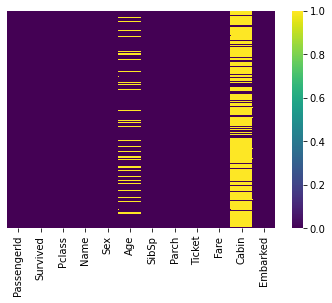

In [10]:
sns.heatmap(titanic.isnull(),yticklabels=False,cmap="viridis")

### 1. Age

In [11]:
#replacing missing values in Age column with mean value
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)

### 2. Embarked

In [12]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
titanic['Embarked'].fillna("S",inplace= True)

In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### 3. Cabin

In [16]:
# drop cabin columns bcoz heavy data missing.
titanic=titanic.drop(columns='Cabin',axis=1)

In [17]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Outliers Detection

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

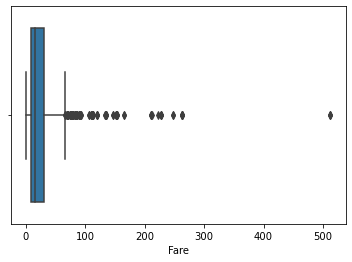

In [18]:
sns.boxplot(titanic['Fare'])

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

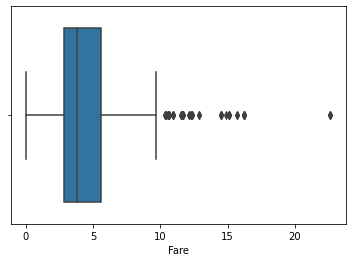

In [19]:
sns.boxplot(np.sqrt(titanic['Fare']))

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

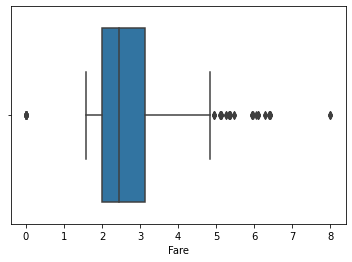

In [20]:
sns.boxplot((titanic['Fare'])**(1/3))

In [21]:
Fare_sqrt=np.where(titanic['Fare']<0,0,np.sqrt(titanic['Fare']))

In [22]:
titanic['Fare_n']=Fare_sqrt

In [23]:
titanic['Fare_n'].describe()

count    891.000000
mean       4.851220
std        2.946119
min        0.000000
25%        2.812542
50%        3.801868
75%        5.567764
max       22.634690
Name: Fare_n, dtype: float64

In [24]:
titanic=titanic.drop(columns='Fare',axis=1)

## Data Visulization

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

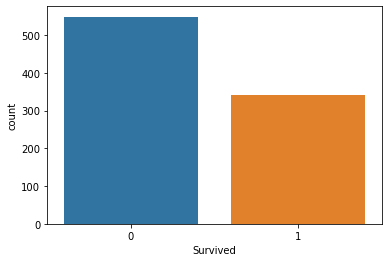

In [25]:
#making count plot for survuved data

sns.countplot("Survived",data=titanic)

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

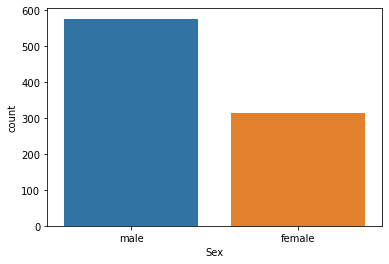

In [26]:
sns.countplot("Sex",data=titanic)

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

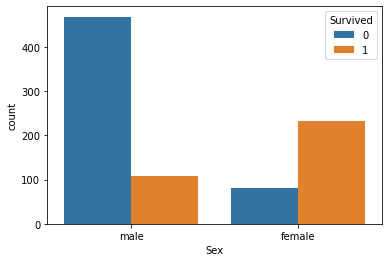

In [27]:
#checking how many people survived in each gender
sns.countplot("Sex",hue="Survived",data=titanic)

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

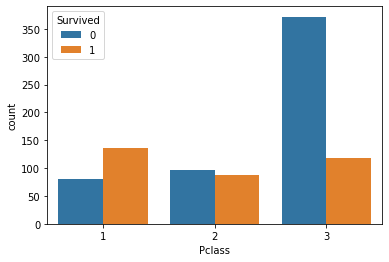

In [28]:
# #checking how many people survived based on Pclass

sns.countplot("Pclass",hue="Survived",data=titanic)

In [29]:
#converting  categorical columns

titanic.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [30]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Fare_n
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,2.692582
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,1,8.442944


# Modelling

## 1. LOgistic Regression

In [31]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [32]:
#import train test split method
from sklearn.model_selection import train_test_split

In [33]:
X = titanic.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic['Survived']

In [34]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=6)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [36]:
#Fit  Logistic Regression 
model = LogisticRegression()

In [37]:
model.fit(X_train, Y_train)

LogisticRegression()

In [38]:
X_train_prediction = model.predict(X_train)

In [39]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7823033707865169


## 2. Decision Tree

In [40]:
from sklearn import tree

In [41]:
dt=tree.DecisionTreeClassifier()

In [42]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [43]:
Y_Pred=dt.predict(X_train)

In [44]:
from sklearn import metrics

In [45]:
print("Accuracy - ",metrics.accuracy_score(Y_train,Y_Pred))

Accuracy -  0.9845505617977528


## 3. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf=RandomForestClassifier(n_estimators=100,bootstrap=False)

In [48]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=False)

In [49]:
Y_Pred=rf.predict(X_train)

In [50]:
print("Accuracy = ",metrics.accuracy_score(Y_train,Y_Pred))

Accuracy =  0.9845505617977528


## Confusion Metrics

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_train , Y_Pred)
print(confusion_matrix)

[[435   1]
 [ 10 266]]


In [52]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [53]:
accuracy = accuracy_score(Y_train, Y_Pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(Y_train, Y_Pred)
print('Precision: %f' % precision)
recall = recall_score(Y_train, Y_Pred)
print('Recall: %f' % recall)
f1 = f1_score(Y_train, Y_Pred)
print('F1 score: %f' % f1)

Accuracy: 0.984551
Precision: 0.996255
Recall: 0.963768
F1 score: 0.979742


## We use Logistics Regression , Decision Tree and Random Forest 
## but we prefer Decision Tree Classifier because it gives higher accuracy on train Data which is 98.45%.

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

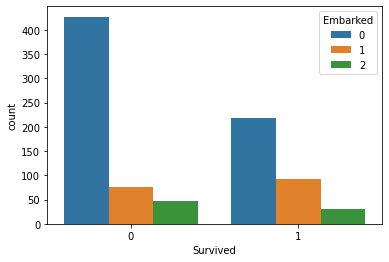

In [55]:
sns.countplot("Survived",hue="Embarked",data=titanic)

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

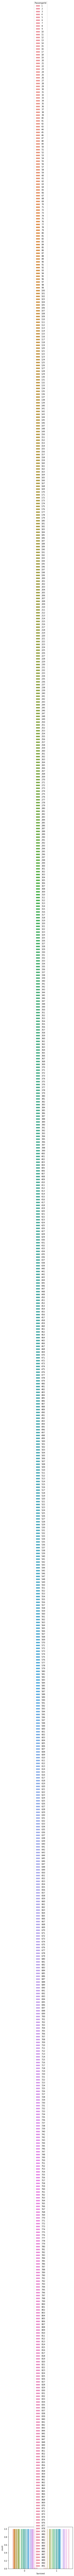

In [60]:
sns.countplot("Survived",hue="PassengerId",data=titanic)

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

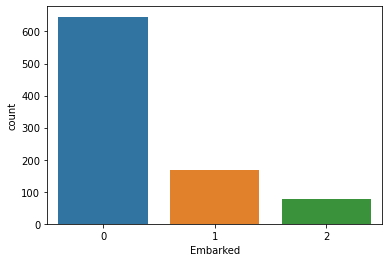

In [70]:
sns.countplot("Embarked",data=titanic)

In [80]:
len('Fare')

4

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

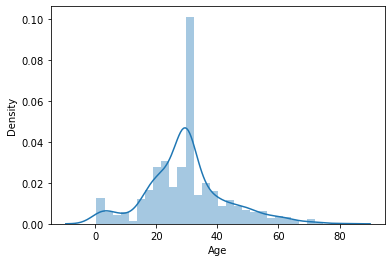

In [83]:
sns.distplot(titanic['Age'])